#  El Problema


Vamos a comenzar por los datos que nos proporciona una competición de DrivenData

[Warm Up: Machine Learning with a Heart](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/)

El conjunto de datos es un clásico del aprendizaje automático. Procede de un estudio de enfermedades cardíacas realizado hace 30 años.

El estudio, convenientemente anonimizado,  recoge varias mediciones sobre la salud de los pacientes y las estadísticas cardiovasculares.


En primer lugar vamos a estudiar el conjunto de entrenamiento (*train_values* y *train_labels*) que facilita la competición y que se puede encontrar en este [link](https://drive.google.com/drive/folders/1NfqnfLQqM-gJu5dh0hAhMURO-7_uDHdK?usp=sharing)

# Preparación


Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns



# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

In [3]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

En primer lugar subimos los datos de los pacientes de entrenamiento con sus características (**fichero train_values**)

In [6]:
train_feat = upload_files()
train_feat.head()

Saving train_values.csv to train_values (1).csv
User uploaded file "train_values (1).csv" with length 9591 bytes


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


Posteriormente subimos los datos que únicamente nos proporcionan las "labels" de estos pacientes (**fichero train_labels**)

In [7]:
train_labels = upload_files()
train_labels.head()

Saving train_labels.csv to train_labels (1).csv
User uploaded file "train_labels (1).csv" with length 1653 bytes


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [8]:
train = pd.merge(train_feat,train_labels,on='patient_id')

train.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Finalmente subimos los datos para generar la evaluación final (**fichero test_values**)

In [9]:
test = upload_files()
test.head()

Saving test_values.csv to test_values (1).csv
User uploaded file "test_values (1).csv" with length 4864 bytes


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


## Preparando la evaluación

Para la evaluación vamos a utilizar siempre una matriz de confusión que presentaremos mediante la siguiente función

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

También necesitamos una función para mostrar aquellos modelos seleccionados por los mecanismos de optimización que vamos a utilizar.

In [11]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [12]:
selected_features = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved']

Y para poder hacer el "tuning" de nuestro modelos necesitamos que nuestros datos de entrenamiento estén a su vez divididos entre entrenamiento y test (sobre todo porque no contamos con la evaluación de la competición)

In [13]:
from sklearn.model_selection import train_test_split

# feature selection and transformation
X = train[selected_features]
y = train['heart_disease_present']
# train and test
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

# Naive Bayes

Dado un ejemplo x representado por k valores, el clasificador Naïve Bayes se basa en encontrar la hipótesis más probable que describa a ese ejemplo. Si la descripción de ese ejemplo viene dada por los valores (a1,…, an), la hipótesis más probable será aquella que cumpla que tenga la mayor probabilidad de que, conocidos los valores que describen a ese ejemplo, éste pertenezca a
la clase vj, donde vj es el valor de la función de clasificación f(x) en el conjunto infinito V.

Podemos estimar P(vj) contando las veces que aparece el ejemplo vj en el conjunto de entrenamiento y dividiéndolo por el número total de ejemplos que forman este conjunto. Para estimar el término P(a1,..., an), es decir, las veces en que para cada categoría aparecen los valores del ejemplo x, se debe
recorrer todo el conjunto de entrenamiento.

Para poder aplicarlos vamos a probar todas las modalidades del mismo que nos ofrece scikit-learn: Gaussian, Multinomial, Bernouilli, Complement.

In [14]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# classifiers
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(names, classifiers):

  # FIT THE MODEL
  clf.fit(X_train, y_train)
  # PREDIT AND SCORE
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.62
Modelo: MultiNomialNB =   0.56
Modelo: BernouilliNB =   0.50
Modelo: ComplementNB =   0.58


Escogemos al mejor y lo ejecutamos sobre el propio test, luego lo ejecutaremos sobre el test final para generar el fichero de subida a la competición.

Metrics 
              precision    recall  f1-score   support

           0       0.58      0.86      0.70        36
           1       0.74      0.39      0.51        36

    accuracy                           0.62        72
   macro avg       0.66      0.62      0.60        72
weighted avg       0.66      0.62      0.60        72

Confusion matrix, without normalization
[[31  5]
 [22 14]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

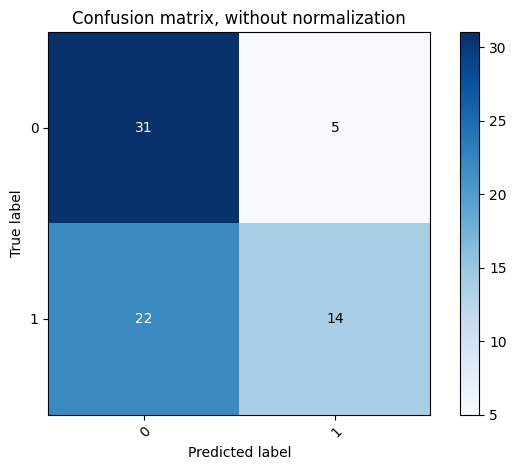

In [15]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

Preparamos un fichero de salida

In [ ]:
res = clf.predict(test[selected_features])
output = pd.DataFrame({ 'patient_id': test['patient_id'], 'heart_disease_present': res})
output.head()




,patient_id,heart_disease_present
0,olalu7,0
1,z9n6mx,0
2,5k4413,1
3,mrg7q5,0
4,uki4do,1


Y guardamos el fichero en disco para luego subirlo a la competición (si queremos participar)

In [ ]:
from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)


files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>